# 学习方法
* 多尝试
* 别打算全记牢，过一下知道有这些方法
* 熟练使用百度
* 学会解决bug

# 本节课目录：
1. 数字类型的常规操作：math,random,numpy
1. 字符串基本操作
1. 字符串模块：re基础用法
1. 时间日期操作
1. 列表和元组
1. 字典
1. 文件类型

## 1. 数字类型的常规操作：math,random,numpy

* 基本数学操作

In [8]:
import math
v1 = math.pi
v2 = math.sqrt(80)
v3 = math.log10(2**1000)
v4 = math.pow(2,10)
v5 = math.factorial(6)
#请在下方输出上面变量
print(v5)

720


* 随机数的产生

In [20]:
import random
v6 = random.random()#01分布
v7 = random.choice([1,2,3,4])#随机选择
v8 = random.randint(0,10)#随机整数
v9 = random.uniform(1,10)#均匀分布
v10 = random.gauss(0,1)#高斯分布
#请在下方输出上面变量
print(v10)

1.0


 **小例子：使用随机产生的高斯分布数据画图**   </br>

numpy库使用手册：[numpy:tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)   </br>  

matplotlib库画图使用手册：[matplotlib.pyplot:tutorial](https://matplotlib.org/users/pyplot_tutorial.html)</br>  

参考帮助：[matplotlib 绘图可视化知识点整理](http://python.jobbole.com/85106/)

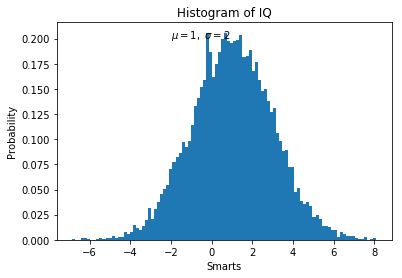

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#这句话是让画的图在行中显示

mu, sigma = 1, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)#numpy库的模块中的随机类型继承random模块

# the histogram of the data
n, bins, patches = plt.hist(s, 100, density=True)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(-2, .2, r'$\mu=1,\ \sigma=2$')
plt.grid(True)

plt.show()

## 2. 字符串基本操作

In [31]:
text = 'c++ python2 python3 perl ruby lua java javascript php4 php5 c'

#index, slice
s1 = text[0]
s2 = text[0:3]
s3 = text[-1]
s4 = text[4:-1]
s5 = text[0:10:2]
#请在下方输出上面变量
print(s5)

python2 python3 perl ruby lua java javascript php4 php5 


In [36]:
# split, join
a = text.split(' ')
b = '￥￥￥'.join(a)
print(b)

c++￥￥￥python2￥￥￥python3￥￥￥perl￥￥￥ruby￥￥￥lua￥￥￥java￥￥￥javascript￥￥￥php4￥￥￥php5￥￥￥c


In [33]:
# + , *
s6 = text[0:4]+text[-2:len(text)]
s7 = text[0:4]*5
print(s7)

c++ c++ c++ c++ c++ 


In [39]:
#other func
print('1: ',text.upper())
print('2: ',text.find('py'))#返回第一个找到的位置
print('3: ',text.replace('python','fortran'))
print('4: ',"%s like %s" %('we','python'))

1:  C++ PYTHON2 PYTHON3 PERL RUBY LUA JAVA JAVASCRIPT PHP4 PHP5 C
2:  4
3:  c++ fortran2 fortran3 perl ruby lua java javascript php4 php5 c
4:  we like python


In [45]:
#strip:Python strip() 方法用于移除字符串头尾指定的字符（默认为空格）
text2 = 'c++     '
print('text2.strip(): ',text2.strip())
print('text2.strip(\'c\'): ',text2.strip('c'))

text2.strip():  c++
text2.strip('c'):  ++     


## 3.字符串模块：re基础用法</br>

[re基础用法](http://www.runoob.com/python/python-reg-expressions.html)


In [54]:
import re
text = 'c++ python2 python3 perl ruby lua java javascript php4 php5 c'
#match,search,findall,split,sub
print(re.match('java',text))
print(re.search('java',text))

#print(re.match(r'c++',text))会报错，是因为+号是re模块中的通配符，需要使用\将其变为普通
print(re.match('c\+\+',text))

print (re.findall('python',text))
print (re.split('perl',text))
print (re.sub('ruby','fortran',text))

None
<_sre.SRE_Match object; span=(34, 38), match='java'>
<_sre.SRE_Match object; span=(0, 3), match='c++'>
['python', 'python']
['c++ python2 python3 ', ' ruby lua java javascript php4 php5 c']
c++ python2 python3 perl fortran lua java javascript php4 php5 c


In [56]:
# ^   start
# $   end
# .   except \n
print (re.findall('^c..',text))
print (re.findall('c+',text))#+统配0个及以上
print (re.findall('c.',text))#.统配1个
print (re.findall('c\++',text))
print (re.findall('c$',text))

['c++']
['c', 'c', 'c']
['c+', 'cr']
['c++']
['c']


In [61]:
# +   1-inf
# *   0-inf
# ?   0-1, 
# []  or
# {}  repeat
# [^] not
print (re.findall('p+',text))
print (re.findall('p[a-zA-Z]+',text))  #{1,}
print (re.findall('p[a-zA-Z]*',text))  #{0,}
print (re.findall('p[a-zA-Z]?',text))  #{0,1}
print (re.findall('p[a-zA-Z0-9]{0,}',text))  #{n，}匹配 n 个前面表达式。

print ( re.findall('c[a-zA-Z]*',text))  #{,inf}
print (re.findall('c[^a-zA-Z]*',text))  #{,inf}

['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p']
['python', 'python', 'perl', 'pt', 'php', 'php']
['python', 'python', 'perl', 'pt', 'php', 'php']
['py', 'py', 'pe', 'pt', 'ph', 'p', 'ph', 'p']
['python2', 'python3', 'perl', 'pt', 'php4', 'php5']
['c', 'cript', 'c']
['c++ ', 'c', 'c']


In [63]:
# |   or
print (re.findall('[pj][a-zA-Z]+',text))  #{,inf}
# |重写上面的pattern
print (re.findall('p[^0-9 ]+|j[a-zA-Z]+',text))

['python', 'python', 'perl', 'java', 'javascript', 'php', 'php']
['python', 'python', 'perl', 'java', 'javascript', 'php', 'php']


In [73]:
# \w  [a-zA-Z0-9_], \W
# \d  [0-9], \D
# \s  [ \t\n\r\f\v], \S
print (re.findall('p\w+',text))
print (re.findall('p\w+\d',text))
print (re.findall('p\w+[0-9]',text))
print (re.findall('p\w{,3}',text))
print (re.findall('p\w{2,3}',text))

['python2', 'python3', 'perl', 'pt', 'php4', 'php5']
['python2', 'python3', 'php4', 'php5']
['python2', 'python3', 'php4', 'php5']
['pyth', 'pyth', 'perl', 'pt', 'php4', 'php5']
['pyth', 'pyth', 'perl', 'php4', 'php5']


In [74]:
# ()  group
# (?P<name>pattern)
a=re.search(r'(?P<name>p[a-zA-Z]+)(?P<version>[0-9])','python2')
print (a.group('name'), a.group('version'))
print (a.groupdict())

python 2
{'name': 'python', 'version': '2'}


In [76]:
# re.compile:可以将匹配模式复用
pattern = re.compile('(?P<name>p[a-zA-Z]+)(?P<version>[0-9])')
results = pattern.search('python2')
print (results.groupdict())
results = pattern.search('python3')
print (results.groupdict())

{'name': 'python', 'version': '2'}
{'name': 'python', 'version': '3'}


## 4. 时间日期操作

In [77]:
import datetime

In [80]:
# 1. 从现在开始3天后和3天前是哪一天
a=datetime.date.today()
b=datetime.datetime.now()
d1=datetime.timedelta(days=3)
d2=datetime.timedelta(hours=3)

print((a-d1).isoformat())
print((a+d1).strftime('%m/%d/%Y'))
print(b.isoformat())
print((b-d2))

2018-05-10
05/16/2018
2018-05-13T09:35:09.178660
2018-05-13 06:35:09.178660


In [84]:
# 2. 离你的重要纪念日还有多少天
important_day=datetime.datetime.strptime('2018-06-1','%Y-%m-%d') 
now = datetime.datetime.now()
print(important_day>now)
d3=b-important_day
print(d3)
print(d3.days)
t=datetime.time(12,11,30)
print(t)

True
-19 days, 9:35:09.178660
-19
12:11:30


In [88]:
# 3. 两段程序哪个快些
############## time.time and time.clock ####################
import time

a=input("please input 0 or 1:")

start_time = time.time()
start_clock = time.clock()


if str(a)=='0':
    sum_i=0
    for i in range(100000):
        sum_i+=i
else:
    sum_i=sum(range(100000))

print(sum_i)

time.sleep(2)
end_time = time.time()
end_clock = time.clock()

print("time-delta:")
print(start_time-end_time)
print("clock-delta:")
print(start_clock-end_clock)

please input 0 or 1:0
4999950000
time-delta:
-2.0242247581481934
clock-delta:
-2.0244698884554992


## 5.列表和元组

In [95]:
a=[1,2,3,4,5]
print("----------- index and slice ----------")

print(a[0])
print(a[-1])
print(a[0:4])
print(a[0:5:2])

----------- index and slice ----------
1
5
[1, 2, 3, 4]
[1, 3, 5]


In [96]:
print("------------ ref and copy -----------")

a_ref=a
print("a="+str(a))
a[2]=100
print("a_ref="+str(a_ref))

a_copy = a[:]
print("a_copy="+str(a_copy))

------------ ref and copy -----------
a=[1, 2, 3, 4, 5]
a_ref=[1, 2, 100, 4, 5]
a_copy=[1, 2, 100, 4, 5]


In [97]:
print("------------ list methods ----------")
a.append(300)
print("After append: a="+str(a))

a.insert(1,50)
print("After insert: a="+str(a))

a.pop()
print("After pop: a="+str(a))

a.sort()
print("After sort: a="+str(a))

a.reverse()
print("After reverse: a="+str(a))

del a[0]
print("After del: a="+str(a))

------------ list methods ----------
After append: a=[1, 2, 100, 4, 5, 300]
After insert: a=[1, 50, 2, 100, 4, 5, 300]
After pop: a=[1, 50, 2, 100, 4, 5]
After sort: a=[1, 2, 4, 5, 50, 100]
After reverse: a=[100, 50, 5, 4, 2, 1]
After del: a=[50, 5, 4, 2, 1]


## 6.字典

In [115]:
#--------用dict直接生成, 
name_age=(('xiaoli',33),('xiaowang',20),('xiaozhang',40))
a=dict(name_age)
b=dict(xiaoli=33,xiaowang=20,xiaozhang=40)
print('a: '+str(a))
print('b: ',b)

a: {'xiaoli': 33, 'xiaowang': 20, 'xiaozhang': 40}
b:  {'xiaoli': 33, 'xiaowang': 20, 'xiaozhang': 40}


In [116]:
#--------如何将两个等长度的list合并成dict
text = 'c++ python shell ruby java javascript c'
code_num = [38599, 100931, 26153, 93142, 84275, 184220, 46843]

text_list=text.split(' ')
code_dict = dict(zip(text_list,code_num))
print(code_dict)

{'c++': 38599, 'python': 100931, 'shell': 26153, 'ruby': 93142, 'java': 84275, 'javascript': 184220, 'c': 46843}


In [117]:
#--------key, keys, items, values
code_dict['python']
code_dict.keys()
code_dict.values()
code_dict.items()
print(code_dict.keys())
for key in code_dict.keys():
    print(key)

dict_keys(['c++', 'python', 'shell', 'ruby', 'java', 'javascript', 'c'])
c++
python
shell
ruby
java
javascript
c


In [118]:
#--------get
a=code_dict.get('fortran',"啥都没有呀")
print(a)

啥都没有呀


In [119]:
#------- ref and copy
a_ref = code_dict
a_copy = code_dict.copy()

In [120]:
#--------update, del, copy, clear
other_code = {'php':78014,'objective-c':34444}
code_dict.update(other_code)
del code_dict['c++']
print(a_ref)
print(a_copy)
print(a_ref.clear())
print(a)

{'python': 100931, 'shell': 26153, 'ruby': 93142, 'java': 84275, 'javascript': 184220, 'c': 46843, 'php': 78014, 'objective-c': 34444}
{'c++': 38599, 'python': 100931, 'shell': 26153, 'ruby': 93142, 'java': 84275, 'javascript': 184220, 'c': 46843}
None
啥都没有呀


In [121]:
#--------sort key and value
[(k,a_copy[k]) for k in sorted(a_copy.keys())]

[('c', 46843),
 ('c++', 38599),
 ('java', 84275),
 ('javascript', 184220),
 ('python', 100931),
 ('ruby', 93142),
 ('shell', 26153)]

## 7.文件类型

* F = open(path,mode)</br>

   mode = 'r','w','a'</br>
   
   
* F = codecs.open(path,mode,encoding)

In [125]:
import codecs#中文支持
f=codecs.open('file_ch.txt','w','utf-8')
#write file
f.write('用python做些事\n')
f.write('袁洁\n')
f.write('是个好人\n')
f.close()

In [126]:
#read file
f=codecs.open('file_ch.txt','r','utf-8')
print(f.readline())
print(f.readline())
print(f.readline())
f.close()

用python做些事

袁洁

是个好人



In [127]:
########################## os ################
import os
print(os.path.exists('file_ch.txt'))
os.rename('file_ch.txt', 'file_test.txt')
print(os.path.exists('file_ch.txt'))

True
False
